In [9]:
import pandas as pd
import numpy as np
import folium
import matplotlib
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('data_6.1~6.15.xlsx')
df = df.dropna()
df['location'] = df['latitude'].astype(str) + ', ' + df['longitude'].astype(str)


In [4]:
telco_data = df[['start time', 'end time', 'location']]
telco_data['workload'] = (telco_data['end time']-telco_data['start time']).dt.total_seconds()
telco_data = telco_data[['workload', 'location']]
telco_data = telco_data.groupby(by = ["location"]).sum()
telco_data = telco_data.reset_index()
telco_data['location'] = [tuple([float(y) for y in x.split(",")]) for x in telco_data['location']]
telco_data = telco_data[['workload', 'location']]


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2892\2283480817.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telco_data['workload'] = (telco_data['end time']-telco_data['start time']).dt.total_seconds()


In [5]:
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2769 entries, 0 to 2768
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   workload  2769 non-null   float64
 1   location  2769 non-null   object 
dtypes: float64(1), object(1)
memory usage: 43.4+ KB


In [6]:
telco_data.head(10)

workload                 location
0  1507810.0  (22.522803, 114.218796)
1   643543.0  (24.284812, 102.999068)
2    50378.0  (25.222206, 117.086322)
3  3755547.0  (26.139329, 103.078562)
4   763464.0  (26.215115, 109.744661)
5    81696.0  (28.738742, 120.640606)
6     5385.0  (28.812629, 115.952954)
7     4810.0  (29.151779, 120.985563)
8   590670.0  (29.263844, 115.023159)
9   849378.0  (29.526266, 119.910488)

Mean: 475615.2343806428
Standard Deviation: 623999.1869276938
Interquartile Range: 653128.0
Q1: 36501.0
Q3: 689629.0


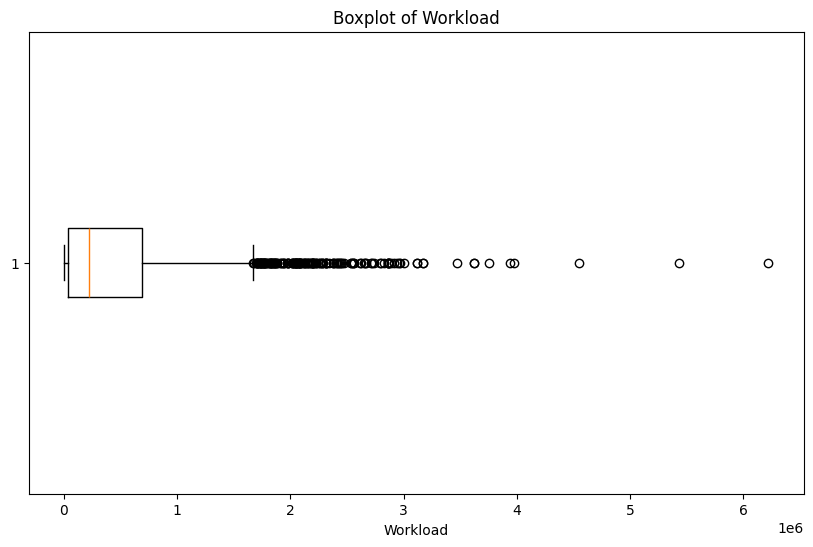

In [11]:
mean_workload = telco_data['workload'].mean()
std_workload = telco_data['workload'].std()
q1 = telco_data['workload'].quantile(0.25)
q3 = telco_data['workload'].quantile(0.75)
iqr_workload = q3 - q1

print(f"Mean: {mean_workload}")
print(f"Standard Deviation: {std_workload}")
print(f"Interquartile Range: {iqr_workload}")
print(f"Q1: {q1}")
print(f"Q3: {q3}")

plt.figure(figsize=(10,6))
plt.boxplot(telco_data['workload'], vert=False)
plt.xlabel('Workload')
plt.title('Boxplot of Workload')
plt.show()

In [7]:
m = folium.Map(location=[31.224361, 121.469170], zoom_start=10)

for index, row in telco_data.iterrows():
    folium.CircleMarker(
        location=row['location'],
        radius=row['workload'] / 500000,  # size by workload
        color='blue',
        fill=True,
        fill_color='blue',
        popup=f"Workload: {row['workload']}"
    ).add_to(m)

m

In [8]:
telco_data.to_pickle('processed_data.pickle')